In [ ]:
"""
Delhi Weather Prediction using  Decision Tree Classifier.

Data Science Mini Project by Omkar Bahiwal
The Given Dataset is the weather information of the Delhi UT from 1996 to 2017.

The EDA is performed on the Dataset. Finding the Temperature and Weather changes.

I have tried to predict the weather ‘_conds’ field.
Like if the weather will be smoke, Haze or Clear.

Decision Tree Algorithm has been used as a Logistic Classifier.

Performed the following on Dataset-
1) Read Dataset.
2) Perform EDA.
3) Clean Dataset.
4) Feature Extraction.
5) Data Pre-Processing.
6) Train and Test Dataset.
7) Create Model.
8) Validate.

"""


In [2]:
# Import required Libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz

In [3]:
# get the Dataset
df = pd.read_csv("./delhiweatherdata.csv")

In [4]:
# printing the first 5 datapoints
df.head()

,datetime_utc,_conds,_dewptm,_fog,_hail,_heatindexm,_hum,_precipm,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wdire,_wgustm,_windchillm,_wspdm
0,19961101-11:00,Smoke,9.0,0,0,NaN,27.0,NaN,1010.0,0,0,30.0,0,0,5.0,280.0,West,NaN,NaN,7.4
1,19961101-12:00,Smoke,10.0,0,0,NaN,32.0,NaN,-9999.0,0,0,28.0,0,0,NaN,0.0,North,NaN,NaN,NaN
2,19961101-13:00,Smoke,11.0,0,0,NaN,44.0,NaN,-9999.0,0,0,24.0,0,0,NaN,0.0,North,NaN,NaN,NaN
3,19961101-14:00,Smoke,10.0,0,0,NaN,41.0,NaN,1010.0,0,0,24.0,0,0,2.0,0.0,North,NaN,NaN,NaN
4,19961101-16:00,Smoke,11.0,0,0,NaN,47.0,NaN,1011.0,0,0,23.0,0,0,1.2,0.0,North,NaN,NaN,0.0


In [5]:
# getting a count
df.count()

datetime_utc    100990
 _conds         100918
 _dewptm        100369
 _fog           100990
 _hail          100990
 _heatindexm     29155
 _hum           100233
 _precipm            0
 _pressurem     100758
 _rain          100990
 _snow          100990
 _tempm         100317
 _thunder       100990
 _tornado       100990
 _vism           96562
 _wdird          86235
 _wdire          86235
 _wgustm          1072
 _windchillm       579
 _wspdm          98632
dtype: int64

In [6]:
# EDA for the Data set is as follows -

# counting the frequency of weathers on a particular day.

In [7]:
df.columns = map(lambda x: x.strip(), df.columns)

In [8]:
df._conds.value_counts()

Haze                             47602
Smoke                            20760
Mist                              9375
Clear                             3129
Widespread Dust                   2856
Fog                               2760
Scattered Clouds                  2209
Partly Cloudy                     2091
Shallow Fog                       1860
Mostly Cloudy                     1537
Light Rain                        1302
Partial Fog                       1031
Patches of Fog                     901
Thunderstorms and Rain             486
Heavy Fog                          421
Light Drizzle                      414
Rain                               394
Unknown                            383
Blowing Sand                       378
Overcast                           326
Thunderstorm                       192
Light Thunderstorms and Rain       176
Drizzle                            112
Light Fog                           64
Light Thunderstorm                  64
Heavy Rain               

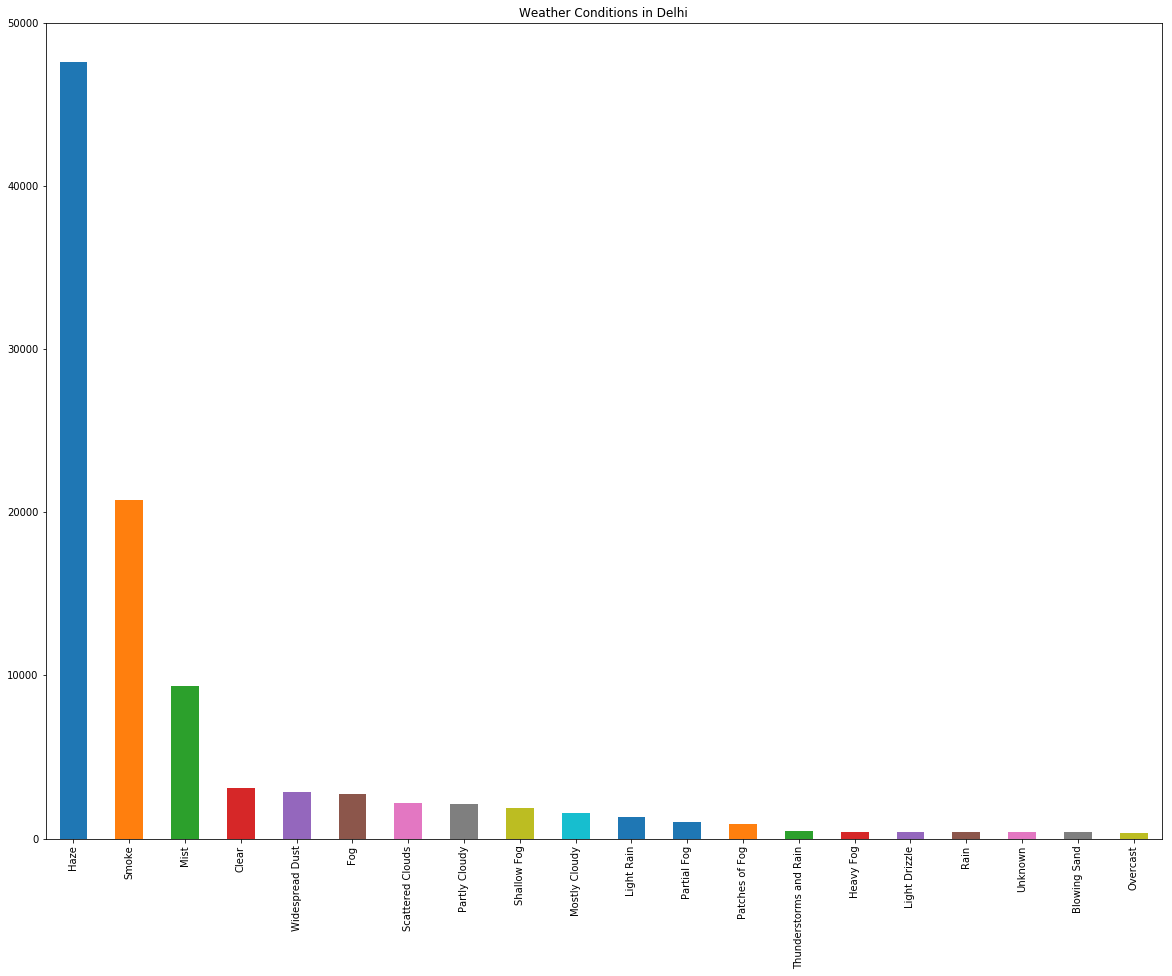

In [9]:
# plotting th top 20 weather frequency

plt.figure(figsize=(20, 15));
df._conds.value_counts().head(20).plot(kind='bar');
plt.title("Weather Conditions in Delhi")
plt.plot();

In [10]:
# getting the mean of all the temperature values, Average Temperature throughout the dataset.
print("average temprature in delhi:", round(df._tempm.mean(axis=0),2))

('average temprature in delhi:', 25.45)


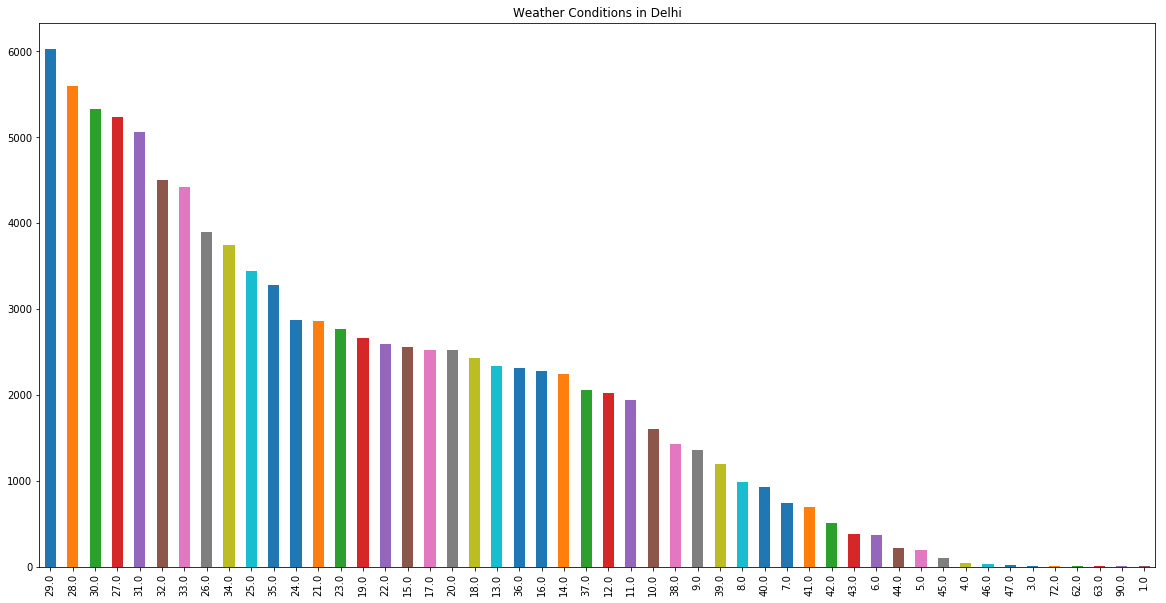

In [11]:
# temperature Frequency
plt.figure(figsize=(20, 10));
df._tempm.value_counts().head(50).plot(kind='bar');
plt.title("Weather Conditions in Delhi")
plt.plot();
# most common temp is 29 degree C.

In [12]:
# function to use with lambda to get the corresponding coumn values
def get_year(value):
    return (value[0:4])
def get_month(value):
    return (value[4:6])

In [13]:
# getting year and month wise data in seperate variables.
df["year"] = df["datetime_utc"].apply(lambda x:get_year(x))
df["month"] = df["datetime_utc"].apply(lambda x:get_month(x))

In [14]:
# printing the years with min and Max temperatures.
print("max, min: ", df.year.max(), ",", df.year.min())

('max, min: ', '2017', ',', '1996')


In [15]:
# Plotting th 
df.year.value_counts()
df.groupby("year")._tempm.mean()
df_mean = df.groupby("year")._tempm.mean().reset_index().sort_values('_tempm', ascending=True)
df_mean.dtypes
df_mean.year = df_mean.year.astype("float")
df_mean.dtypes

year      float64
_tempm    float64
dtype: object

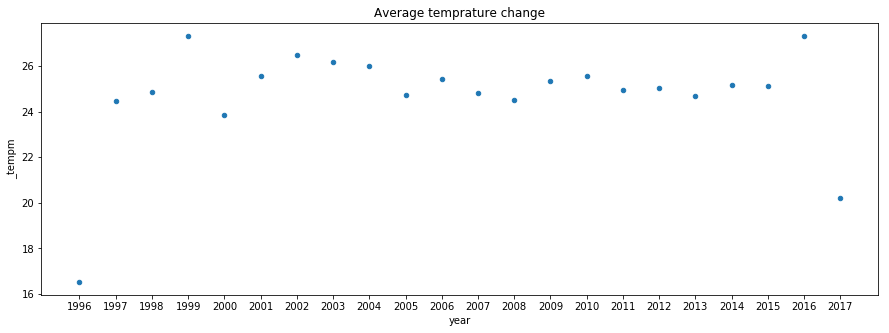

In [16]:
# plotting the average temperature change.

df_mean.plot(kind="scatter", x="year", y="_tempm", figsize=(15, 5))
plt.xticks(df_mean.year);
plt.title("Average temprature change");
plt.plot();

In [17]:
# Data Cleanning 
# removing the missing and unnecessary values from the dataset.

In [18]:
df.isnull().sum()

datetime_utc         0
_conds              72
_dewptm            621
_fog                 0
_hail                0
_heatindexm      71835
_hum               757
_precipm        100990
_pressurem         232
_rain                0
_snow                0
_tempm             673
_thunder             0
_tornado             0
_vism             4428
_wdird           14755
_wdire           14755
_wgustm          99918
_windchillm     100411
_wspdm            2358
year                 0
month                0
dtype: int64

In [19]:
df.columns

Index([u'datetime_utc', u'_conds', u'_dewptm', u'_fog', u'_hail',
       u'_heatindexm', u'_hum', u'_precipm', u'_pressurem', u'_rain', u'_snow',
       u'_tempm', u'_thunder', u'_tornado', u'_vism', u'_wdird', u'_wdire',
       u'_wgustm', u'_windchillm', u'_wspdm', u'year', u'month'],
      dtype='object')

In [20]:
df_filtered = df[['datetime_utc', '_conds', '_dewptm', '_fog', '_hail',
       '_hum', '_pressurem', '_rain', '_snow', '_tempm',
       '_thunder', '_tornado', '_vism', '_wdird', '_wdire'
       , '_wspdm', 'year', "month"]]

In [21]:
df_filtered[df_filtered._dewptm.isnull()]

,datetime_utc,_conds,_dewptm,_fog,_hail,_hum,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wdire,_wspdm,year,month
124,19961108-01:00,Smoke,NaN,0,0,NaN,1014.0,0,0,NaN,0,0,2.0,0.0,North,0.0,1996,11
240,19961113-02:00,Smoke,NaN,0,0,NaN,1012.0,0,0,NaN,0,0,NaN,280.0,West,5.6,1996,11
303,19961116-06:00,Unknown,NaN,0,0,NaN,-9999.0,0,0,NaN,0,0,NaN,0.0,North,NaN,1996,11
520,19961126-04:00,Smoke,NaN,0,0,NaN,1017.0,0,0,NaN,0,0,1.6,0.0,North,0.0,1996,11
584,19961129-18:00,Smoke,NaN,0,0,NaN,-9999.0,0,0,NaN,0,0,0.7,0.0,North,0.0,1996,11
812,19961210-09:00,Haze,NaN,0,0,NaN,-9999.0,0,0,NaN,0,0,5.0,290.0,WNW,18.5,1996,12
820,19961210-17:00,Unknown,NaN,0,0,NaN,1017.0,0,0,NaN,0,0,1.2,0.0,North,0.0,1996,12
830,19961211-07:00,Unknown,NaN,0,0,NaN,-9999.0,0,0,NaN,0,0,NaN,0.0,North,NaN,1996,12
858,19961212-19:00,Smoke,NaN,0,0,NaN,-9999.0,0,0,NaN,0,0,1.0,0.0,North,0.0,1996,12
969,19961218-00:00,Shallow Fog,NaN,1,0,NaN,1018.0,0,0,NaN,0,0,0.6,230.0,SW,3.7,1996,12


In [22]:
# removing and replacing the values whererver there is NaN
for index,row in df_filtered[df_filtered._dewptm.isnull()].iterrows():
    mean_val = df_filtered[df_filtered["year"] == row["year"]]._dewptm.mean()
    df_filtered.at[index, "_dewptm"] = mean_val

In [23]:
df_filtered[df_filtered._dewptm.isnull()]
df_filtered.shape
df_filtered.isnull().sum()
df_filtered[df_filtered._hum.isnull()]

,datetime_utc,_conds,_dewptm,_fog,_hail,_hum,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wdire,_wspdm,year,month
124,19961108-01:00,Smoke,5.992851,0,0,NaN,1014.0,0,0,NaN,0,0,2.00,0.0,North,0.0,1996,11
240,19961113-02:00,Smoke,5.992851,0,0,NaN,1012.0,0,0,NaN,0,0,NaN,280.0,West,5.6,1996,11
303,19961116-06:00,Unknown,5.992851,0,0,NaN,-9999.0,0,0,NaN,0,0,NaN,0.0,North,NaN,1996,11
520,19961126-04:00,Smoke,5.992851,0,0,NaN,1017.0,0,0,NaN,0,0,1.60,0.0,North,0.0,1996,11
584,19961129-18:00,Smoke,5.992851,0,0,NaN,-9999.0,0,0,NaN,0,0,0.70,0.0,North,0.0,1996,11
812,19961210-09:00,Haze,5.992851,0,0,NaN,-9999.0,0,0,NaN,0,0,5.00,290.0,WNW,18.5,1996,12
820,19961210-17:00,Unknown,5.992851,0,0,NaN,1017.0,0,0,NaN,0,0,1.20,0.0,North,0.0,1996,12
830,19961211-07:00,Unknown,5.992851,0,0,NaN,-9999.0,0,0,NaN,0,0,NaN,0.0,North,NaN,1996,12
858,19961212-19:00,Smoke,5.992851,0,0,NaN,-9999.0,0,0,NaN,0,0,1.00,0.0,North,0.0,1996,12
969,19961218-00:00,Shallow Fog,5.992851,1,0,NaN,1018.0,0,0,NaN,0,0,0.60,230.0,SW,3.7,1996,12


In [24]:
for index,row in df_filtered[df_filtered._hum.isnull()].iterrows():
    mean_val = df_filtered[df_filtered["year"] == row["year"]]._hum.mean()
    df_filtered.at[index, "_hum"] = mean_val
    

In [25]:
df_filtered[df_filtered._hum.isnull()]

,datetime_utc,_conds,_dewptm,_fog,_hail,_hum,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wdire,_wspdm,year,month


In [26]:
df_filtered.isnull().sum()
df_filtered[df_filtered._pressurem.isnull()]


,datetime_utc,_conds,_dewptm,_fog,_hail,_hum,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wdire,_wspdm,year,month
60703,20040625-21:00,Haze,21.0,0,0,62.0,NaN,0,0,26.0,0,0,2.0,NaN,NaN,0.0,2004,06
60723,20040628-09:00,Haze,20.0,0,0,27.0,NaN,0,0,37.0,0,0,4.0,0.0,North,3.7,2004,06
60728,20040629-00:00,Haze,21.0,0,0,63.0,NaN,0,0,27.0,0,0,2.0,NaN,NaN,0.0,2004,06
60921,20040723-09:00,Haze,24.0,0,0,37.0,NaN,0,0,37.0,0,0,2.0,NaN,NaN,0.0,2004,07
61255,20040829-18:00,Haze,27.0,0,0,75.0,NaN,0,0,31.0,0,0,2.0,NaN,NaN,0.0,2004,08
61270,20040831-15:00,Haze,24.0,0,0,54.0,NaN,0,0,31.0,0,0,2.0,NaN,NaN,0.0,2004,08
61394,20040911-09:00,Haze,21.0,0,0,38.0,NaN,0,0,34.0,0,0,4.0,230.0,SW,7.4,2004,09
62409,20050114-03:00,Smoke,7.0,0,0,64.0,NaN,0,0,12.0,0,0,1.0,250.0,WSW,3.7,2005,01
62501,20050125-15:00,Haze,10.0,0,0,84.0,NaN,0,0,12.0,0,0,1.0,NaN,NaN,0.0,2005,01
63218,20050426-15:00,Haze,16.0,0,0,31.0,NaN,0,0,30.0,0,0,2.0,NaN,NaN,0.0,2005,04


In [27]:
df_filtered._pressurem.replace(-9999.0, np.nan, inplace=True)
df_filtered._pressurem.isnull().sum()
for index,row in df_filtered[df_filtered._pressurem.isnull()].iterrows():
    mean_val = df_filtered[df_filtered["year"] == row["year"]]._pressurem.mean()
    df_filtered.at[index, "_pressurem"] = mean_val
    
    

/Library/Python/2.7/site-packages/pandas/core/generic.py:5890: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [28]:
df_filtered.isnull().sum()

datetime_utc        0
_conds             72
_dewptm             0
_fog                0
_hail               0
_hum                0
_pressurem          0
_rain               0
_snow               0
_tempm            673
_thunder            0
_tornado            0
_vism            4428
_wdird          14755
_wdire          14755
_wspdm           2358
year                0
month               0
dtype: int64

In [29]:
for index,row in df_filtered[df_filtered._tempm.isnull()].iterrows():
    mean_val = df_filtered[df_filtered["year"] == row["year"]]._tempm.mean()
    df_filtered.at[index, "_tempm"] = mean_val

for index,row in df_filtered[df_filtered._vism.isnull()].iterrows():
    mean_val = df_filtered[df_filtered["year"] == row["year"]]._vism.mean()
    df_filtered.at[index, "_vism"] = mean_val
    
for index,row in df_filtered[df_filtered._wdird.isnull()].iterrows():
    mean_val = df_filtered[df_filtered["year"] == row["year"]]._wdird.mean()
    df_filtered.at[index, "_wdird"] = mean_val
    
for index,row in df_filtered[df_filtered._wspdm.isnull()].iterrows():
    mean_val = df_filtered[df_filtered["year"] == row["year"]]._wspdm.mean()
    df_filtered.at[index, "_wspdm"] = mean_val

df_filtered.isnull().sum()

datetime_utc        0
_conds             72
_dewptm             0
_fog                0
_hail               0
_hum                0
_pressurem          0
_rain               0
_snow               0
_tempm              0
_thunder            0
_tornado            0
_vism               0
_wdird              0
_wdire          14755
_wspdm              0
year                0
month               0
dtype: int64

In [30]:
for index,row in df_filtered[df_filtered._wdire.isnull()].iterrows():
    most_frequent = df_filtered[df_filtered["year"] == row["year"]]._wdire.value_counts().idxmax()
    df_filtered.at[index, "_wdire"] = most_frequent

df_filtered.isnull().sum()

datetime_utc     0
_conds          72
_dewptm          0
_fog             0
_hail            0
_hum             0
_pressurem       0
_rain            0
_snow            0
_tempm           0
_thunder         0
_tornado         0
_vism            0
_wdird           0
_wdire           0
_wspdm           0
year             0
month            0
dtype: int64

In [31]:
# Replaced Missing
df_filtered.year = df_filtered.year.astype("object")
df_filtered.month = df_filtered.month.astype("object")
df_filtered.dtypes
pd.crosstab(df_filtered.year, [df_filtered.month], values=df_filtered._tempm, aggfunc="mean")
df.head()

/Library/Python/2.7/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


,datetime_utc,_conds,_dewptm,_fog,_hail,_heatindexm,_hum,_precipm,_pressurem,_rain,...,_thunder,_tornado,_vism,_wdird,_wdire,_wgustm,_windchillm,_wspdm,year,month
0,19961101-11:00,Smoke,9.0,0,0,NaN,27.0,NaN,1010.0,0,...,0,0,5.0,280.0,West,NaN,NaN,7.4,1996,11
1,19961101-12:00,Smoke,10.0,0,0,NaN,32.0,NaN,-9999.0,0,...,0,0,NaN,0.0,North,NaN,NaN,NaN,1996,11
2,19961101-13:00,Smoke,11.0,0,0,NaN,44.0,NaN,-9999.0,0,...,0,0,NaN,0.0,North,NaN,NaN,NaN,1996,11
3,19961101-14:00,Smoke,10.0,0,0,NaN,41.0,NaN,1010.0,0,...,0,0,2.0,0.0,North,NaN,NaN,NaN,1996,11
4,19961101-16:00,Smoke,11.0,0,0,NaN,47.0,NaN,1011.0,0,...,0,0,1.2,0.0,North,NaN,NaN,0.0,1996,11


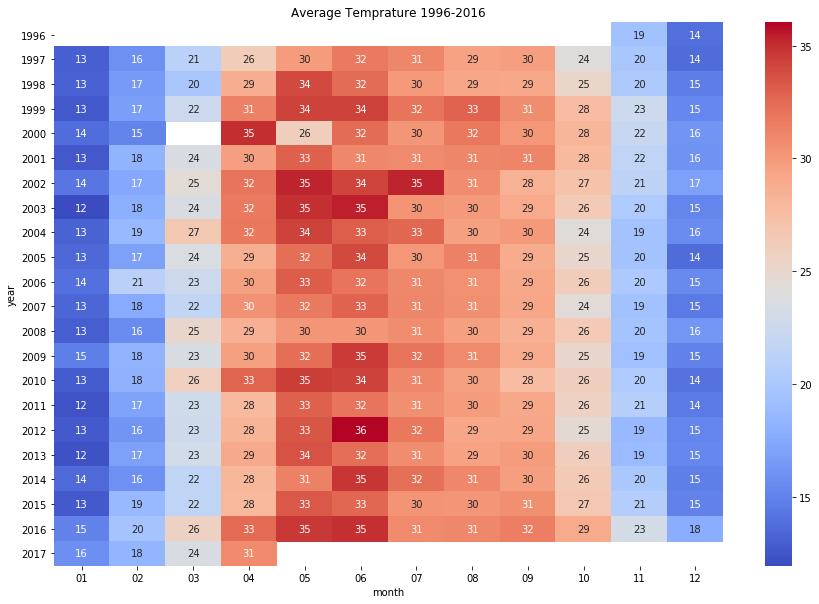

In [32]:
# Heatmap for year and average temprature across the month. More red more heat, more blue less heat
plt.figure(figsize=(15, 10));
sns.heatmap(pd.crosstab(df_filtered.year, [df_filtered.month], values=df_filtered._tempm, aggfunc="mean"),
            cmap="coolwarm", annot=True, cbar=True);
plt.title("Average Temprature 1996-2016")
plt.plot();



In [33]:
df_filtered._conds.value_counts()

Haze                             47602
Smoke                            20760
Mist                              9375
Clear                             3129
Widespread Dust                   2856
Fog                               2760
Scattered Clouds                  2209
Partly Cloudy                     2091
Shallow Fog                       1860
Mostly Cloudy                     1537
Light Rain                        1302
Partial Fog                       1031
Patches of Fog                     901
Thunderstorms and Rain             486
Heavy Fog                          421
Light Drizzle                      414
Rain                               394
Unknown                            383
Blowing Sand                       378
Overcast                           326
Thunderstorm                       192
Light Thunderstorms and Rain       176
Drizzle                            112
Light Fog                           64
Light Thunderstorm                  64
Heavy Rain               

In [34]:
# Feature and Target Matrices 


In [35]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
df_filtered.columns
feature_columns = ['_wdire', '_dewptm', '_fog', '_hail', '_hum',
       '_pressurem', '_rain', '_snow', '_tempm', '_thunder', '_tornado',
       '_vism', '_wdird', '_wspdm', 'year', 'month', '_conds']


In [36]:
# Creating New Data set of labled values.
df_final = df_filtered[feature_columns]
df_final.head()
df_final.dtypes
df_final._wdire.value_counts()
wdire_dummies = pd.get_dummies(df_final["_wdire"])
df_final = pd.concat([wdire_dummies, df_final], axis=1)
df_final.head()
df_final.columns
df_final.drop("_wdire", inplace=True, axis=1)

In [37]:
df_final.columns
X = df_final.iloc[:, 0:-1].values
X.shape
y = df_final.iloc[:, -1].values
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
y.shape


(100990,)

In [38]:
#Train Data
from sklearn.model_selection import train_test_split


In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=0) # test size =0.25 or 25%
print("Shape of X_train", X_train.shape)
print("Shape of X_test", X_test.shape)
print("Shape of y_train", y_train.shape)
print("Shape of y_test", y_test.shape)

('Shape of X_train', (75742, 32))
('Shape of X_test', (25248, 32))
('Shape of y_train', (75742,))
('Shape of y_test', (25248,))


In [40]:
# Create Model Decision Tree
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion="entropy", random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(y_pred)

[ 6  6 32 ... 16 25 21]


In [41]:
# Display Accuracy
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, y_pred))

("DecisionTrees's Accuracy: ", 0.7807351077313055)


In [42]:
# End of Program